In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.kernel_ridge import KernelRidge
from scipy import stats
from scipy.stats import skew
import warnings
import xgboost

warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

In [35]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

combine = [train_df,test_df]

In [36]:
# train_df.head()
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
"numerical feature"
# GrLivArea.地面以上居住面积（平方英尺）。线性分布。GrLivArea = 1stFlrSF + 2ndFlrSF + LowQualFinSF
# 1stFlrSF.一楼面积（平方英尺）
# 2ndFlrSF.二楼面积（平方英尺）
# LowQualFinSF.低品质成品面积，这里可以认为除一二楼以外的楼层面积（平方英尺）

# TotRmsAbvGrd.房间总数
# BedroomAbvGr.地下室以上的卧室数（个数）
# KitchenAbvGr.地下室以上的厨房数（个数）
# FullBath.浴室（个数）
# HalfBath.半浴室（个数）

# Fireplaces.壁炉的数量（个数）
# WoodDeckSF.木质露天平台面积（平方英尺）
# OpenPorchSF.敞廊面积（平方英尺）
# EnclosedPorch.封闭廊道（平方英尺）
# 3SsnPorch.三季门廊（平方英尺）
# ScreenPorch.纱窗阳台（平方英尺）
# PoolArea.泳池（平方英尺）
# MiscVal.杂项（?）
# MoSold.月销售（月份）
# YrSold.年销售（年份）

# GarageYrBlt.车库建造年份（年份）
# GarageCars.车库容量（汽车辆数）
# GarageArea.车库面积（平方英尺）

# TotalBsmtSF.地下室的总面积（平方英尺）。TotalBsmtSF = BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF
# BsmtFinSF1.第一地下室面积（平方英尺）
# BsmtFinSF2.第二地下室面积（平方英尺）
# BsmtUnfSF.未完工的地下室面积（平方英尺）

# BsmtFullBath.地下室浴室（个数）
# BsmtHalfBath.地下室半浴室（个数），这里可以为简易浴室，没有浴缸的那种

# OverallQual.整体材料和成品质量
# OverallCond.总体状况评级。从散点图中来看，和房价无明显关系
# YearBuilt.原始施工日期
# YearRemodAdd.?
# MasVnrArea.砖石饰面面积(平方英尺)
# MSSubClass.建筑类型。
# LotFrontage.与物业相连的街道的线性英尺数
# LotArea.地皮面积（平方英尺）


"category feature"
# MSZoning.?
# Neighborhood.地段
# Street.街道
# Alley.巷
# LotShape.地皮形状
# LandContour.?
# Utilities.?
# Condition1.靠近主要道路或铁路
# Condition2.靠近主要道路或铁路-第二条
# BldgType.住宅类型
# HouseStyle.住宅样式
# RoofStyle.屋顶样式
# RoofMatl.屋顶材料
# Exterior1st.房屋外覆盖层
# Exterior2nd.房屋外部覆盖层-如果不止一种材料
# MasVnrType.表层砌体类型
# ExterQual.外观材料质量
# ExterCond.外部材料的现状
# Foundation.?
# BsmtQual.地下室材料质量
# BsmtCond.地下室材料的现状
# BsmtExposure.步行或花园级地下室墙壁
# BsmtFinType1.已完成地下室一质量
# BsmtFinType2.已完成地下室二质量
# Heating.暖气装置类型
# HeatingQC.暖气装置现状
# CentralAir.中央空调
# Electrical.电器系统
# KitchenQual.厨房质量
# Functional.家庭功能评分
# FireplaceQu.壁炉质量
# GarageType.车库位置
# GarageFinish.车库内部装修
# GarageQual.车库质量
# GarageCond.车库现状
# PavedDrive.铺砌车道
# PoolQC.泳池质量
# Fence.栅栏质量
# MiscFeature.其他类别未涵盖的其他功能
# SaleType.销售类型
# SaleCondition.销售情况

# 热力图
# corrmat = train_df.corr()
# f,ax = plt.subplots(figsize=(12,12))
# # sns.heatmap(corrmat,vmax=.8,square=True)
# # 关联系数最大的前10个feature
# k = 10
# cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
# cm = np.corrcoef(train_df[cols].values.T)
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)


# y = train_df.SalePrice
# train_labels = y.values.copy

# print(y.describe())
# sns.distplot(y)
# print(y.skew())
# print(y.kurt())


'category feature'

In [12]:
# 筛选出numerical feature和category feature
num_f = [f for f in train_df.columns if train_df.dtypes[f] != 'object']
num_f.pop()
# print(len(num_f))

category_f = [f for f in train_df.columns if train_df.dtypes[f] == 'object']
# print(len(category_f))

In [5]:
# 各地上楼层的面积关系
# train_df[(train_df['GrLivArea'] == train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['LowQualFinSF'])][['GrLivArea','1stFlrSF','2ndFlrSF']]

# 各地下室面积关系
# train_df[(train_df['TotalBsmtSF'] == train_df['BsmtFinSF1'] + train_df['BsmtFinSF2'] + train_df['BsmtUnfSF'])][['TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']]

# train_df[['LotArea','1stFlrSF']]

"散点图"
# var = 'OverallQual'
# data = pd.concat([train_df.SalePrice,train_df[var]],axis=1)
# data.plot.scatter(x=var,y='SalePrice');

"箱图"
# var = 'Neighborhood'
# data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
# f, ax = plt.subplots(figsize=(8, 6))
# fig = sns.boxplot(x=var, y="SalePrice", data=data)
# fig.axis(ymin=0, ymax=800000);
# plt.xticks(rotation=90)

# def jointplot(x,y,**kwargs):
#     try:
#         sns.regplot(x=x,y=y)
#     except Exception:
#         print(x.value_counts())
# f = pd.melt(train_df,id_vars=['SalePrice'],value_vars=num_f)
# g = sns.FacetGrid(f,col='variable',col_wrap=3,sharex=False,sharey=False,size=5)
# # 对所有numerical数据做线性回归拟合
# g = g.map(jointplot,'value','SalePrice')


'箱图'

In [13]:
# var = 'GrLivArea'
# data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
# data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

# 观察GrLivArea的散点图发现：
# 居住面积与价格呈明显的线性关系，例外是右下角两个点，面积大，售价低，不符合实际规律，可将其去掉
train_df.drop(train_df[(train_df['GrLivArea']>4000)&(train_df.SalePrice<300000)].index,inplace=True)

In [7]:

# def boxplot(x, y, **kwargs):
#     sns.boxplot(x=x, y=y)
#     x=plt.xticks(rotation=90)

# f = pd.melt(train_df, id_vars=['SalePrice'], value_vars=category_f)
# g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False,sharey=False,size=5)
# g = g.map(boxplot, "value", "SalePrice") 


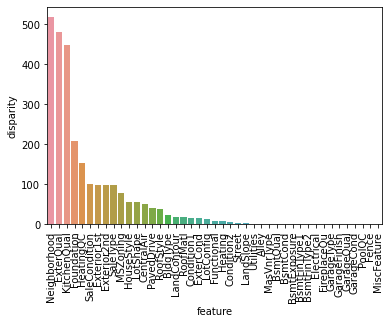

In [14]:
# 单因素方差分析。各个category feature和SalePrice的相关性
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = category_f
    pvals = []
    for c in category_f:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
#         if pval< 0.01 : print("%s %s"%(c,pval))
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(train_df)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)


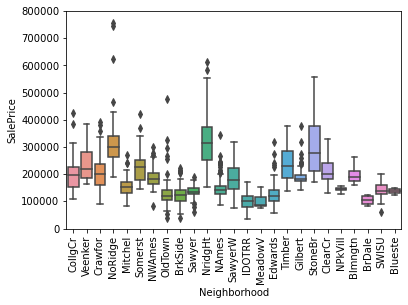

In [15]:
var = 'Neighborhood'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

# 使用K-Means方法对地段进行聚类
data = data.groupby(by='Neighborhood').SalePrice.mean()
location = np.array(data.index)
price_lo = np.array(data.values).reshape(-1,1)
# 对每个地段的平均售价分为3类
km = KMeans(n_clusters=3)
label = km.fit_predict(price_lo)
expense = np.sum(km.cluster_centers_,axis=1)
CityCluster = [[],[],[]]
for i in range(len(location)):
    CityCluster[label[i]].append(location[i])
# for i in range(len(CityCluster)):
#     print("Expense:%.2f" % expense[i])
#     print(CityCluster[i])
# for i in range(len(expense)):
#     print("Ratio:%.1f"%(expense[i]/sum(expense)))
nei_average = pd.Series(CityCluster[0]).drop_duplicates()
nei_exp = pd.Series(CityCluster[1]).drop_duplicates()
nei_cheap = pd.Series(CityCluster[2]).drop_duplicates()

nei_dict = dict()
new1 = dict()
new2 = dict()
nei_dict = nei_dict.fromkeys(['NoRidge', 'NridgHt', 'StoneBr'],5)
new1 = new1.fromkeys(['Blueste', 'BrDale', 'BrkSide', 'Edwards', 
                              'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 
                              'OldTown', 'SWISU', 'Sawyer'],2)
new2 = new2.fromkeys(['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert',
                              'NWAmes', 'SawyerW', 'Somerst', 'Timber', 'Veenker'],3)
nei_dict.update(new1)
nei_dict.update(new2)

In [16]:
# 处理缺失值
NAs = pd.concat([train_df.isnull().sum(),train_df.isnull().sum()/train_df.isnull().count(),test_df.isnull().sum(),test_df.isnull().sum()/test_df.isnull().count()],axis=1,keys=["train","percent_train","test","percent"])
NAs[NAs.sum(axis=1)>1].sort_values(by="percent",ascending=False)

all_data = pd.concat([train_df,test_df],keys=["train","test"])

missing_col_NA = ["Alley","MasVnrType","FireplaceQu","GarageType","PoolQC","Fence",
                   "MiscFeature","GarageQual","GarageCond","GarageFinish"]
missing_col_0 = ["MasVnrArea","GarageCars","GarageArea"]
# 缺失即为没有的用“NA”来填充,数值类型补充为0
for col in missing_col_NA:
     all_data[col].fillna("NA",inplace=True)    
for col in missing_col_0:
    all_data[col].fillna(0,inplace=True)
# 有的缺失数值可以用平均值，众数来补充
    missing_col_mode = ["MSZoning","KitchenQual","Functional","SaleType","Electrical","Exterior1st","Exterior2nd"]
for col in missing_col_mode:
    all_data[col].fillna(all_data[col].mode()[0],inplace=True)
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].apply(lambda x:x.fillna(x.median()))

#由于缺失值的个数是不一样的，所以只有BsmtCond和BsmtQual同时缺失，才将其认为是没有地下室的。
NoBmstIndex = (pd.isnull(all_data["BsmtCond"])==True)&(pd.isnull(all_data["BsmtQual"])==True)
all_data.loc[NoBmstIndex,"BsmtCond"] =all_data.loc[NoBmstIndex,"BsmtCond"].fillna("NA")
all_data.loc[NoBmstIndex,"BsmtQual"] =all_data.loc[NoBmstIndex,"BsmtQual"].fillna("NA")
all_data.loc[NoBmstIndex,"BsmtExposure"] =all_data.loc[NoBmstIndex,"BsmtExposure"].fillna("NA")

#其余的用众数来填充
all_data.BsmtCond.fillna(all_data.BsmtCond.mode()[0],inplace=True)
all_data.BsmtQual.fillna(all_data.BsmtQual.mode()[0],inplace=True)
all_data.BsmtExposure.fillna(all_data.BsmtExposure.mode()[0],inplace=True)

all_data.BsmtFinSF1.fillna(0,inplace=True)
all_data.BsmtFinSF2.fillna(0,inplace=True)
all_data.BsmtFinType1.fillna("NA",inplace=True)
all_data.BsmtFinType2.fillna("NA",inplace=True)

#要将没有地下室和地下室未完成的面积区分开，所以如果是未完成的，将其面积设为中位数
all_data.loc[all_data["BsmtFinType1"]=="Unf","BsmtFinSF1"]=all_data.BsmtFinSF1.median()
all_data.loc[all_data["BsmtFinType2"]=="Unf","BsmtFinSF2"]=all_data.BsmtFinSF1.median()

all_data.BsmtUnfSF.fillna(0,inplace=True)
all_data.TotalBsmtSF.fillna(0,inplace=True)

all_data.BsmtFullBath.fillna(0, inplace=True)
all_data.BsmtHalfBath.fillna(0, inplace=True)

'''
另外还有如Exterior1st 和 Exterior2nd 这样的属性，表示房子外墙的材料类型，如果有两种，
第二个才会有值，但是观察发现有很多第二个跟第一个是一样的，所以将第二个跟第一个一样的Exterior2nd
设为None， 同理Condition1和Condition2也是这样.
'''
all_data.loc[all_data["Exterior1st"]==all_data["Exterior2nd"],"Exterior2nd"]="None"
all_data.loc[all_data["Condition1"]==all_data["Condition2"],"Condition2"]="None"

#Utilities 的取值单一，没有太大意义，故直接将其删除。
all_data.Utilities.value_counts()
all_data.drop('Utilities',axis=1, inplace=True)

# 删除不用特征
all_data.drop(["GarageArea","GarageYrBlt","MiscFeature","Fence","LotFrontage",
               "Street","SaleType","FullBath","1stFlrSF","MasVnrArea","MasVnrType"],
             axis=1,inplace=True)

In [17]:
# 特征工程
# 添加新feature HouseStypeFinish，用来记录住房是否完成。0 -> 未完成；1 -> 已完成
Unf=['2.5Unf','1.5Unf']
all_data["HouseStypeFinish"]=all_data["HouseStyle"].map(lambda x:0 if x in Unf else 1)

# 添加新feature TotalSF。用来记录房屋总面积
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['BsmtFinSF1'] + all_data['BsmtFinSF2'] 

# Quality map 把所有Quality特征转为numerical
qual_dict = { 'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
all_data["ExterQual"] = all_data["ExterQual"].map(qual_dict).astype(int)
all_data["ExterCond"] = all_data["ExterCond"].map(qual_dict).astype(int)
all_data["BsmtQual"] = all_data["BsmtQual"].map(qual_dict).astype(int)
all_data["BsmtCond"] = all_data["BsmtCond"].map(qual_dict).astype(int)
all_data["HeatingQC"] = all_data["HeatingQC"].map(qual_dict).astype(int)
all_data["KitchenQual"] = all_data["KitchenQual"].map(qual_dict).astype(int)
all_data["FireplaceQu"] = all_data["FireplaceQu"].map(qual_dict).astype(int)
all_data["GarageQual"] = all_data["GarageQual"].map(qual_dict).astype(int)
all_data["GarageCond"] = all_data["GarageCond"].map(qual_dict).astype(int)
all_data['PoolQC'] = all_data.PoolQC.replace({'NA':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

#basement finish type map dictionary
bsmt_fin_dict = {'NA': 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
all_data["BsmtFinType1"] = all_data["BsmtFinType1"].map(bsmt_fin_dict).astype(int)
all_data["BsmtFinType2"] = all_data["BsmtFinType2"].map(bsmt_fin_dict).astype(int)
all_data['BsmtExposure'] = all_data.BsmtExposure.replace({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})

#other feature has obvious level category
#all_data['BsmtExposure'] = all_data.BsmtExposure.replace({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})

all_data['CentralAir'] = all_data.CentralAir.replace({'N':0,'Y':1})
all_data['GarageFinish'] = all_data.GarageFinish.replace({'NA':0,'Unf':1,'Rfn':2,'Fin':3})
all_data['GarageType'] = all_data.GarageType.replace({'NA':0,'Detchd':1,'CarPort':2,
                                                      'BuiltIn':3,'Basment':4,'Attchd':5,
                                                     '2Types':6})
all_data['Alley'] = all_data.Alley.replace({'NA':0,'Pave':1,'Grvl':2})
all_data['GarageFinish'] = all_data.GarageFinish.replace({'NA':0,'Unf':1,'RFn':2,'Fin':3})

#Neighborhood map  根据上面的nei_dict，把所有Neighborhood映射为3类
all_data['Neighborhood']=all_data['Neighborhood'].map(nei_dict).astype(int)

# new or old house
all_data["Age"] = 2010 - all_data["YearBuilt"]
# if house is remodeled
all_data['Remolded'] = (all_data["YearRemodAdd"] != all_data["YearBuilt"]) * 1
# time since remodeled
all_data['AgeSinceRem'] = 2010-all_data['YearRemodAdd']
all_data['New'] = ((all_data["YearBuilt"] == all_data["YrSold"]))*1
all_data['New'] = ((all_data["YearRemodAdd"] == all_data["YrSold"]))*1

In [18]:
# 根据特征的每个类型房价均值从低到高把类型分为1,2,3等等
def encode(frame, feature):
    '''
    对所有类型变量，依照各个类型变量的不同取值对应的样本集内房价的均值，按照房价均值高低
    对此变量的当前取值确定其相对数值1,2,3,4等等，相当于对类型变量赋值使其成为连续变量。
    注意：此函数会直接在原frame的DataFrame内创建新的一列来存放feature编码后的值。
    '''
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['price_mean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    # 上述 groupby()操作可以将某一feature下同一取值的数据整个到一起，结合mean()可以直接得到该特征不同取值的房价均值
    ordering = ordering.sort_values('price_mean')
    ordering['order'] = range(1, ordering.shape[0]+1)
    ordering = ordering['order'].to_dict()
#     print(ordering.items())
    for attr_v, score in ordering.items():
        # e.g. qualitative[2]: {'Grvl': 1, 'MISSING': 3, 'Pave': 2}
        frame.loc[frame[feature] == attr_v, feature+'_E'] = score

category_encoded = []
# 由于category集合中包含了非数值型变量和伪数值型变量（多为评分、等级等，其取值为1,2,3,4等等）两类
# 因此只需要对非数值型变量进行encode()处理。
# 如果采用One-Hot编码，则整个qualitative的特征都要进行pd.get_dummies()处理
category_left = ['BldgType','Condition1','Condition2','Electrical','Exterior1st',
                'Exterior2nd','Foundation','Functional','Heating','HouseStyle',
                'LandContour','LandSlope','LotConfig','LotShape','MSZoning',
                'PavedDrive','RoofMatl','RoofStyle','SaleCondition']
for q in category_left:
    encode(all_data, q)
    category_encoded.append(q+'_E')
all_data.drop(category_left, axis=1, inplace=True)  # 离散变量已经有了编码后的新变量，因此删去原变量

# print(category_encoded)
# print(len(category_encoded))


In [19]:
all_data.YrSold = all_data.YrSold.astype(str)
all_data.MoSold = all_data.MoSold.astype(str)
all_data.MSSubClass = all_data.MSSubClass.astype(str)

# all_data.HalfBath = all_data.HalfBath.astype(str)
# all_data.BedroomAbvGr = all_data.BedroomAbvGr.astype(str)
#all_data.GarageCars = all_data.GarageCars.astype(str)


In [20]:
num_new = [f for f in all_data.columns if all_data.dtypes[f] != 'object']
category_new = [f for f in all_data.columns if all_data.dtypes[f] == 'object']
# print(num_new)
# print(category_new)
# print(len(num_new))
# print(len(category_new))


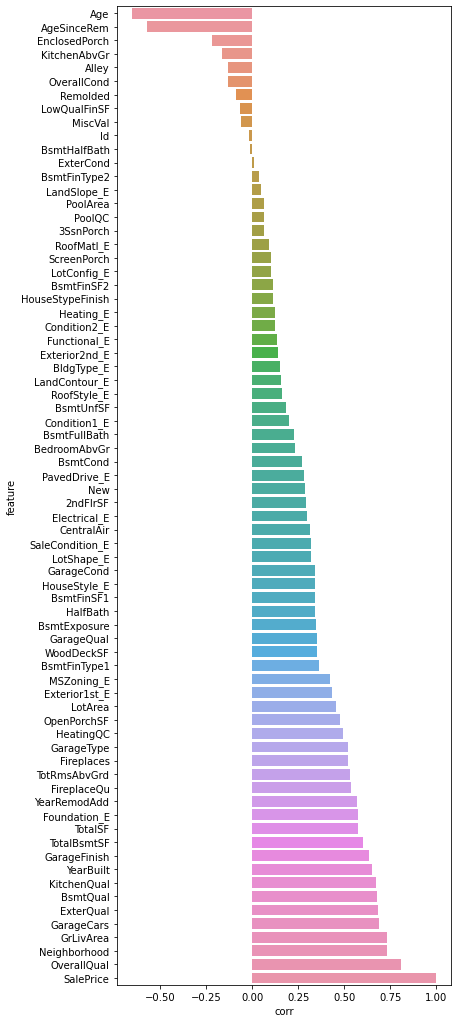

In [21]:
#特征互相关分析与选取相关分析与选取
def spearman(frame, features):
    '''
    采用“斯皮尔曼等级相关”来计算变量与房价的相关性(可查阅百科)
    此相关系数简单来说，可以对上述数值化处理后的等级变量及其它与房价的相关性进行更好的评价
    （特别是对于非线性关系）
    '''
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['corr'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('corr')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='corr', orient='h')    
#features = num_data + category_encoded
spearman(all_data, num_new)


Skewness: 0.121580
Kurtosis: 0.804751


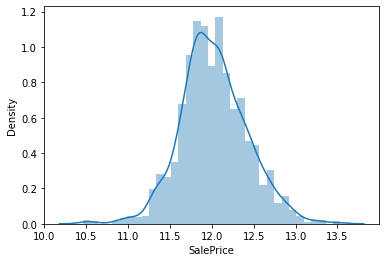

In [22]:

# 对一些数值特征进行对数变换
#log transform the target use log(1+x)
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])
sns.distplot(train_df['SalePrice'])
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())
y = train_df.SalePrice
train_labels = y.values.copy
all_data.drop('SalePrice',axis=1,inplace=True)


In [23]:
#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])


In [24]:
# Create dummy features for categorical values via one-hot encoding
for col in category_new:
    for_dummy = all_data.pop(col)
    extra_data = pd.get_dummies(for_dummy,prefix=col)
    all_data = pd.concat([all_data, extra_data],axis=1)


In [25]:
# 注意对数据的标准化要用到所有数据中，包括训练集和测试集。
N = StandardScaler()
scal_all_data = N.fit_transform(all_data)

print("New number of features : " + str(all_data.shape[1]))
train_all_data = scal_all_data[:train_df.shape[0]]
test_all_data = scal_all_data[train_df.shape[0]:]

print("train:" +str(train_all_data.shape))
print("test:" +str(test_all_data.shape))
print(len(y))
#test_all_data.tail()


New number of features : 104
train:(1458, 104)
test:(1459, 104)
1458


In [26]:
X_train, X_test, y_train, y_test = train_test_split(train_all_data, y,test_size = 0.3, random_state=0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))


X_train : (1020, 104)
X_test : (438, 104)
y_train : (1020,)
y_test : (438,)


In [27]:
#对训练集和测试集分别进行交叉验证，得到error measure for official scoring : RMSE
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)


In [28]:
# 多项式回归
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmse_cv(KRR)
score_test = rmse_cv_test(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score_test.mean(), score_test.std()))


Kernel Ridge score: 0.1197 (0.0107)

Kernel Ridge score: 0.1252 (0.0102)



In [33]:
# 岭回归Ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .5,alpha * .55,alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)
print("Ridge RMSE on Training set :", rmse_cv(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())


Best alpha : 30.0
Try again for more precision with alphas centered around 30.0
Best alpha : 27.0
Ridge RMSE on Training set : 0.11858967096694054
Ridge RMSE on Test set : 0.12566988866475506


Ridge picked 104 features and eliminated the other 0 features


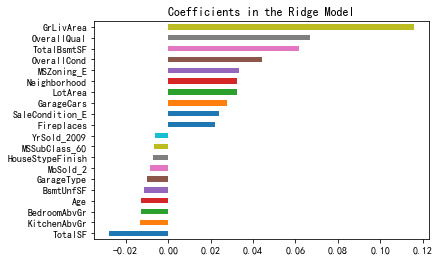

In [34]:
# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = all_data.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()


In [35]:
#lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
#                         0.3, 0.6, 1], 
#                max_iter = 50000, cv = 10)
lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005])
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())


Best alpha : 0.001
Try again for more precision with alphas centered around 0.001
Best alpha : 0.0014
Lasso RMSE on Training set : 0.11655759019738651
Lasso RMSE on Test set : 0.12368703093441624


Lasso picked 75 features and eliminated the other 29 features


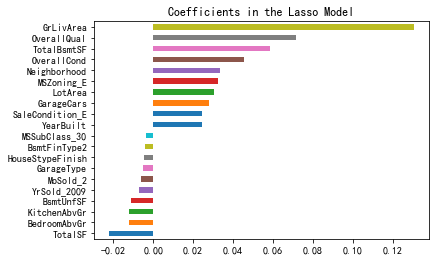

In [36]:
# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = all_data.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()


In [37]:
from sklearn.linear_model import ElasticNetCV
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("ElasticNet RMSE on Training set :", rmse_cv(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())


Best l1_ratio : 0.5
Best alpha : 0.003
Try again for more precision with l1_ratio centered around 0.5
Best l1_ratio : 0.45
Best alpha : 0.003
Now try again for more precision on alpha, with l1_ratio fixed at 0.45 and alpha centered around 0.003
Best l1_ratio : 0.45
Best alpha : 0.003
ElasticNet RMSE on Training set : 0.11664886513647735
ElasticNet RMSE on Test set : 0.12254583592771764


ElasticNet picked 75 features and eliminated the other 29 features


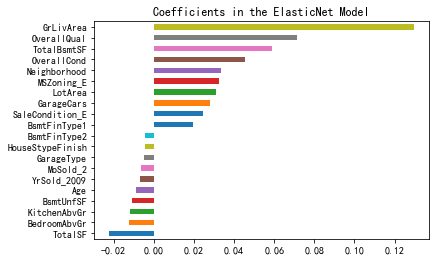

In [38]:
coefs = pd.Series(elasticNet.coef_, index = all_data.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()


In [29]:
from xgboost import XGBRegressor
'''
xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
'''
xgb = XGBRegressor(n_estimators=700,learning_rate=0.07,subsample=0.9,colsample_bytree=0.7)
print('Xgboodt RMSE on training data:',rmse_cv(xgb).mean())
print('Xgboost RMSE on test data:',rmse_cv_test(xgb).mean())


Xgboodt RMSE on training data: 0.12970684998036655
Xgboost RMSE on test data: 0.12943956911811233


In [39]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                max_depth=4, max_features='sqrt',
                                min_samples_leaf=15, min_samples_split=10, 
                                loss='huber', random_state =5)
print('GradientBoost RMSE on training data:',rmse_cv(gbr).mean())
print('GradientBoost RMSE on test data:',rmse_cv_test(gbr).mean())


GradientBoost RMSE on training data: 0.1229733995549916
GradientBoost RMSE on test data: 0.1260562819704552


In [42]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin,clone
from sklearn.model_selection import KFold
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models,weights):
        self.models = models
        self.weights = np.array(weights)
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        for model in self.models_:
             model.fit(X,y)
        return self
    def predict(self,X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.sum(self.weights*predictions, axis=1)

    #aver_model = AveragingModels(models=(elasticNet,KRR,ridge,lasso),weights=(0.5,0.1,0.25,0.15))
#aver_model = AveragingModels(models=(elasticNet,xgb,ridge,lasso),weights=(0.5,0.1,0.25,0.15))
aver_model = AveragingModels(models=(xgb,gbr,elasticNet,ridge,lasso),weights=(0.6,0.1,0.2,0.05,0.05))
print('aver model on train:',rmse_cv(aver_model).mean())
print('aver model on test:',rmse_cv_test(aver_model).mean())


aver model on train: 0.11704392380483881
aver model on test: 0.12118599806230397


In [32]:
#pred_y_log = elasticNet.predict(test_all_data)
xgb.fit(train_all_data,y)
pred_y_log = xgb.predict(test_all_data)
pred_y = np.expm1(pred_y_log)


In [33]:
submission = pd.DataFrame({
        "Id": test_df.Id,
        "SalePrice": pred_y
    })


In [34]:
submission.to_csv('result/submission_aver.csv', index=False)